In [188]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import pandas as pd
import numpy as np
import pkg_resources
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import model_bias_analysis

# autoreload makes it easier to interactively work on code in the model_bias_analysis module.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [189]:
model_families = [
    ['wiki_cnn_v3_100'],#, 'wiki_cnn_v3_101', 'wiki_cnn_v3_102'],
    #['wiki_debias_cnn_v3_100', 'wiki_debias_cnn_v3_101', 'wiki_debias_cnn_v3_102'],
]

In [190]:
# Read the scored data into DataFrame
balanced_madlibs = pd.read_csv('eval_datasets/bias_madlibs_77k_scored.csv')

In [191]:
# Add columns for each subgroup.
f = open('bias_madlibs_data/adjectives_people.txt', 'r')
terms = [line.strip() for line in f]
model_bias_analysis.add_subgroup_columns_from_text(balanced_madlibs, 'text', terms)

In [192]:
def skew_group(balanced, subgroup, label):
    non_toxic_subgroup_items = balanced[balanced[subgroup] & ~balanced[label]]
    drop_indices = np.random.choice(
        non_toxic_subgroup_items.index, len(non_toxic_subgroup_items) // 2, replace=False)
    return balanced.drop(drop_indices)

unbalanced_madlibs = balanced_madlibs
for group in ['lesbian', 'gay', 'bisexual', 'transgender', 'trans', 'queer']:
    unbalanced_madlibs = skew_group(unbalanced_madlibs, group, 'label')
len(unbalanced_madlibs)

74296

In [193]:
eq_diff = model_bias_analysis.per_subgroup_auc_diff_from_overall(
    balanced_madlibs, terms, model_families, squared_error=True, normed_auc=False)
# sort to guarantee deterministic output
eq_diff.sort_values(by=['model_family'], inplace=True)
eq_diff.reset_index(drop=True, inplace=True)
eq_diff.style.background_gradient()

,model_family,pinned_auc_equality_difference
0,wiki_cnn_v3_100,0.00847328


In [194]:
eq_diff = model_bias_analysis.per_subgroup_auc_diff_from_overall(
    unbalanced_madlibs, terms, model_families, squared_error=True, normed_auc=False)
# sort to guarantee deterministic output
eq_diff.sort_values(by=['model_family'], inplace=True)
eq_diff.reset_index(drop=True, inplace=True)
eq_diff.style.background_gradient()

,model_family,pinned_auc_equality_difference
0,wiki_cnn_v3_100,0.00422146


In [195]:
eq_diff = model_bias_analysis.per_subgroup_auc_diff_from_overall(
    balanced_madlibs, terms, model_families, squared_error=True, normed_auc=True)
# sort to guarantee deterministic output
eq_diff.sort_values(by=['model_family'], inplace=True)
eq_diff.reset_index(drop=True, inplace=True)
eq_diff.style.background_gradient()

,model_family,pinned_auc_equality_difference
0,wiki_cnn_v3_100,0.0145843


In [196]:
eq_diff = model_bias_analysis.per_subgroup_auc_diff_from_overall(
    unbalanced_madlibs, terms, model_families, squared_error=True, normed_auc=True)
# sort to guarantee deterministic output
eq_diff.sort_values(by=['model_family'], inplace=True)
eq_diff.reset_index(drop=True, inplace=True)
eq_diff.style.background_gradient()

,model_family,pinned_auc_equality_difference
0,wiki_cnn_v3_100,0.0112832


In [197]:
balanced_pinned_auc_results = model_bias_analysis.per_subgroup_aucs(balanced_madlibs, terms, model_families, 'label')
unbalanced_pinned_auc_results = model_bias_analysis.per_subgroup_aucs(unbalanced_madlibs, terms, model_families, 'label')

In [231]:
#df = pd.DataFrame()
subgroups = list(balanced_pinned_auc_results.subgroup)
balanced_pinned_aucs = [a[0] for a in balanced_pinned_auc_results.wiki_cnn_v3_100_aucs]
balanced_normed_pinned_aucs = [a[0] for a in balanced_pinned_auc_results.wiki_cnn_v3_100_normalized_pinned_aucs]
unbalanced_pinned_aucs = [a[0] for a in unbalanced_pinned_auc_results.wiki_cnn_v3_100_aucs]
unbalanced_normed_pinned_aucs = [a[0] for a in unbalanced_pinned_auc_results.wiki_cnn_v3_100_normalized_pinned_aucs]

df = pd.DataFrame({'subgroup': subgroups,
                   'pinned_auc_balanced_set': balanced_pinned_aucs,
                   'normed_pinned_auc_balanced_set': balanced_normed_pinned_aucs,
                   'pinned_auc_unbalanced_set': unbalanced_pinned_aucs,
                   'normed_pinned_auc_unbalanced_set': unbalanced_normed_pinned_aucs,
                  }, 
                  columns=['subgroup', 'pinned_auc_balanced_set', 'pinned_auc_unbalanced_set', 'normed_pinned_auc_balanced_set', 'normed_pinned_auc_unbalanced_set'])
df['pinned_auc_diff'] = df['pinned_auc_balanced_set'] - df['pinned_auc_unbalanced_set']
df['normed_pinned_auc_diff'] = df['normed_pinned_auc_balanced_set'] - df['normed_pinned_auc_unbalanced_set']
df[0:14].style.set_precision(3)

,subgroup,pinned_auc_balanced_set,pinned_auc_unbalanced_set,normed_pinned_auc_balanced_set,normed_pinned_auc_unbalanced_set,pinned_auc_diff,normed_pinned_auc_diff
0,lesbian,0.955,0.965,0.957,0.957,-0.0107,0.000643
1,gay,0.951,0.973,0.954,0.968,-0.0221,-0.0133
2,bisexual,0.944,0.959,0.941,0.941,-0.0144,-1.49e-05
3,transgender,0.955,0.973,0.953,0.963,-0.018,-0.00972
4,trans,0.971,0.968,0.974,0.973,0.00327,0.00111
5,queer,0.901,0.929,0.88,0.886,-0.0283,-0.0058
6,lgbt,0.971,0.973,0.975,0.976,-0.0019,-0.00136
7,lgbtq,0.964,0.958,0.966,0.962,0.00522,0.00332
8,homosexual,0.957,0.953,0.954,0.953,0.0039,0.000534
9,straight,0.974,0.968,0.977,0.973,0.00557,0.0038


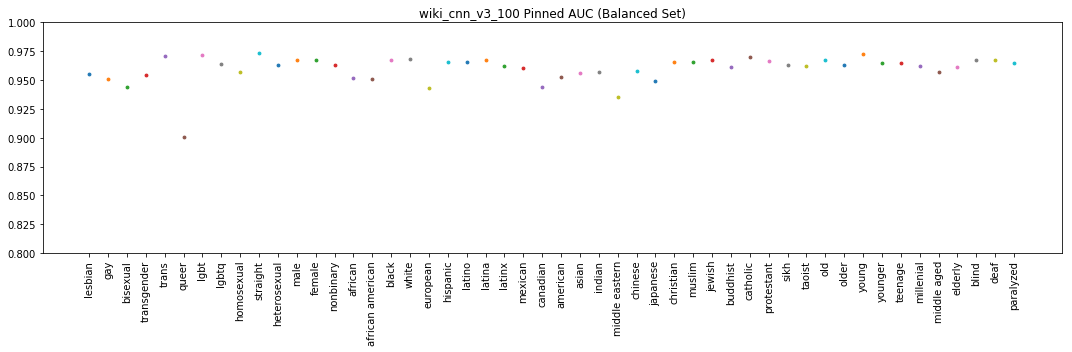

In [219]:
for family in model_families:
    name = model_bias_analysis.model_family_name(family)
    model_bias_analysis.per_subgroup_scatterplots(
        balanced_pinned_auc_results,
        'subgroup',
        name + '_aucs',
        title=name + ' Pinned AUC (Balanced Set)',
        y_lim=(0.8, 1.0))

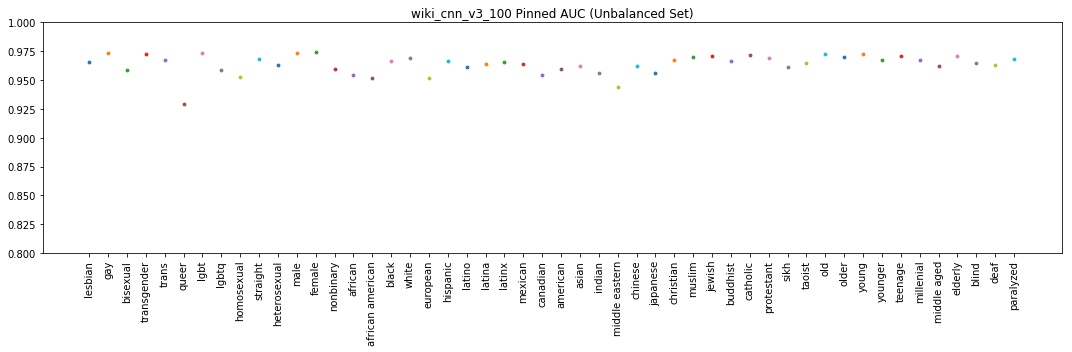

In [201]:
for family in model_families:
    name = model_bias_analysis.model_family_name(family)
    model_bias_analysis.per_subgroup_scatterplots(
        unbalanced_pinned_auc_results,
        'subgroup',
        name + '_aucs',
        title=name + ' Pinned AUC (Unbalanced Set)',
        y_lim=(0.8, 1.0))

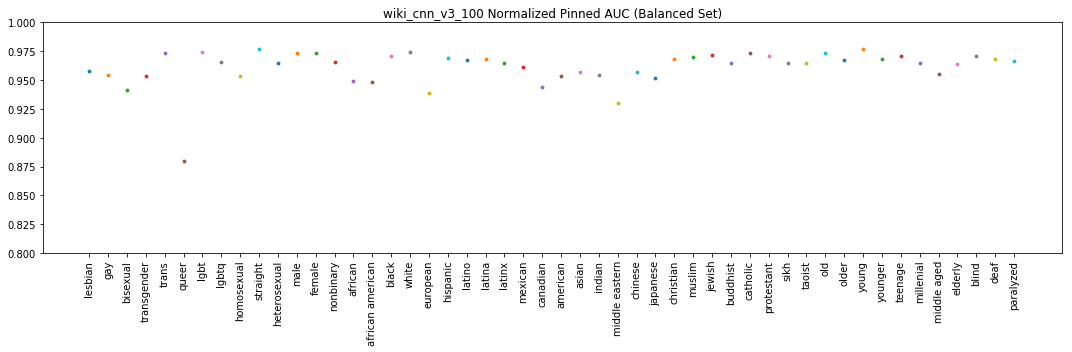

In [202]:
for family in model_families:
    name = model_bias_analysis.model_family_name(family)
    model_bias_analysis.per_subgroup_scatterplots(
        balanced_pinned_auc_results,
        'subgroup',
        name + '_normalized_pinned_aucs',
        title=name + ' Normalized Pinned AUC (Balanced Set)',
        y_lim=(0.8, 1.0))

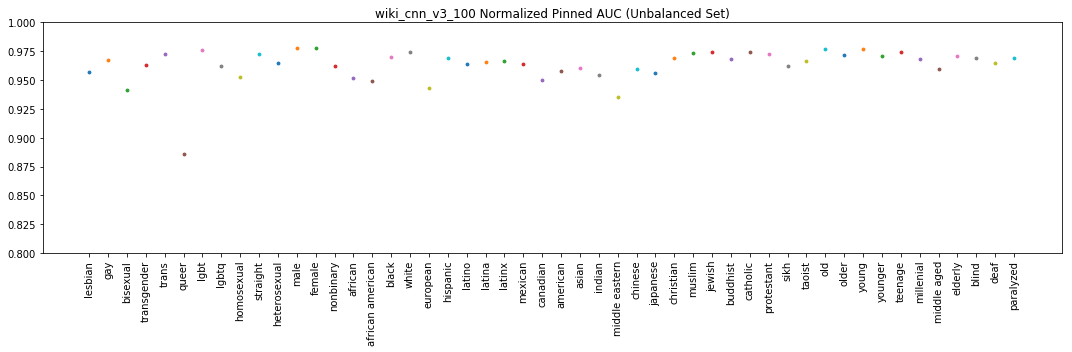

In [203]:
for family in model_families:
    name = model_bias_analysis.model_family_name(family)
    model_bias_analysis.per_subgroup_scatterplots(
        unbalanced_pinned_auc_results,
        'subgroup',
        name + '_normalized_pinned_aucs',
        title=name + ' Normalized Pinned AUC (Unbalanced Set)',
        y_lim=(0.8, 1.0))

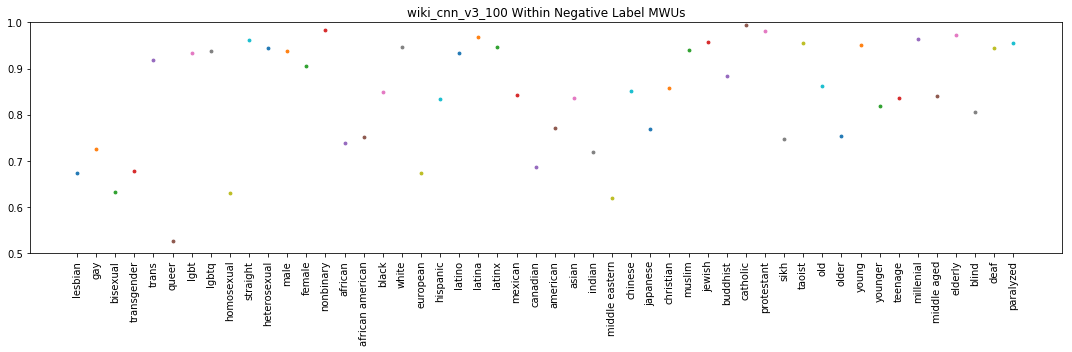

In [207]:
for family in model_families:
    name = model_bias_analysis.model_family_name(family)
    model_bias_analysis.per_subgroup_scatterplots(
        balanced_pinned_auc_results,
        'subgroup',
        name + '_within_negative_label_mwus',
        title=name + ' Within Negative Label MWUs',
        y_lim=(0.5, 1.0))

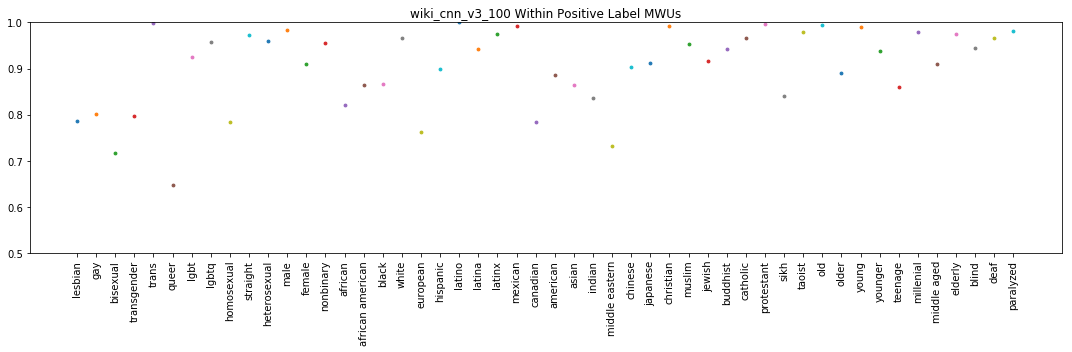

In [208]:
for family in model_families:
    name = model_bias_analysis.model_family_name(family)
    model_bias_analysis.per_subgroup_scatterplots(
         balanced_pinned_auc_results,
        'subgroup',
        name + '_within_positive_label_mwus',
        title=name + ' Within Positive Label MWUs',
        y_lim=(0.5, 1.0))